### Descrição do problema

Os dados abaixo são o resultado de uma análise química feita com vinhos de três diferentes vinículas de uma mesma região da Itália. A análise realizada encontrou um total de treze substâncias presentes em cada um dos três tipos de vinho.
O conjunto de dados está completo (sem *missing data*), representando um total de 178 amostras.

Os arquivos foram extraídos da página *Wine Dataset for Clustering* do **kaggle**:</br></br>**https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering**</br></br>

Neste ensaio em particular, o objetivo é determinar os **grupos (clusters)** de vinhos com base nos constituintes químicos de cada amostra tendo características similares.</br></br>Para a construção dos modelos, exploramos os algoritmos **K-Means** e **Affinity Propagation**.</br>A métrica de avaliação dos clusters será a **silhouette score média**.

### Informações do dataset

- **alcohol**: teor alcoólico do vinho, medido em volume percentual</br>
- **malic_acid**: conteúdo de ácido málico, um ácido orgânico encontrado na maçã e em outras frutas</br>
- **ash**: quantidade total de minerais inorgânicos no vinho</br>
- **ash_alcanity**: Alcalinidade das cinzas</br>
- **magnesium**: conteúdo de magnésio no vinho</br>
- **total_phenols**: quantidade total de fenóis, compostos orgânicos presentes no vinho</br>
- **flavanoids**: subgrupo dos fenóis que contribuem para a cor e o sabor do vinho</br>
- **nonflavanoid_phenols**: outro subgrupo de fenóis, presente em menor quantidade</br>
- **proanthocyanins**: compostos polifenólicos presentes no vinho</br>
- **color_intensity**: intensidade de cor do vinho</br>
- **hue**: tom de cor do vinho</br>
- **OD280/OD315 of diluted wines (od280)**: razão entre a absorbância do vinho a 280 nm e a 315 nm, após diluição</br>
- **proline**: aminoácido presente no vinho.

### Observações    

Visando otimizar o aprendizado, os dados brutos foram submetidos a uma etapa de pré-processamento pelo instrutor do curso que incluiu a normalização dos atributos. Com efeito, os atributos estão em escalas parecidas, o que é indispensável em se tratando de algoritmos que envolvem cálculos de distâncias, como é o caso do **K-Means** e **Affinity Propagation**. Assim, os dados já se encontram tratados para a aplicação das técnicas de clusterização.

# 1.0 - Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# 2.0 - Carregando os dados

In [2]:
df = pd.read_csv('data/X_dataset.csv')
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


## 2.1 - Variáveis: informações gerais

In [3]:
# Perceba que não há dados faltantes e todos eles são do tipo 'float64'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


# 3.0 - Visualização

## 3.1 - O seguinte gráfico permite visualizar todas as combinações possíveis de pares de variáveis, fornecendo uma visão geral rápida das relações entre elas.

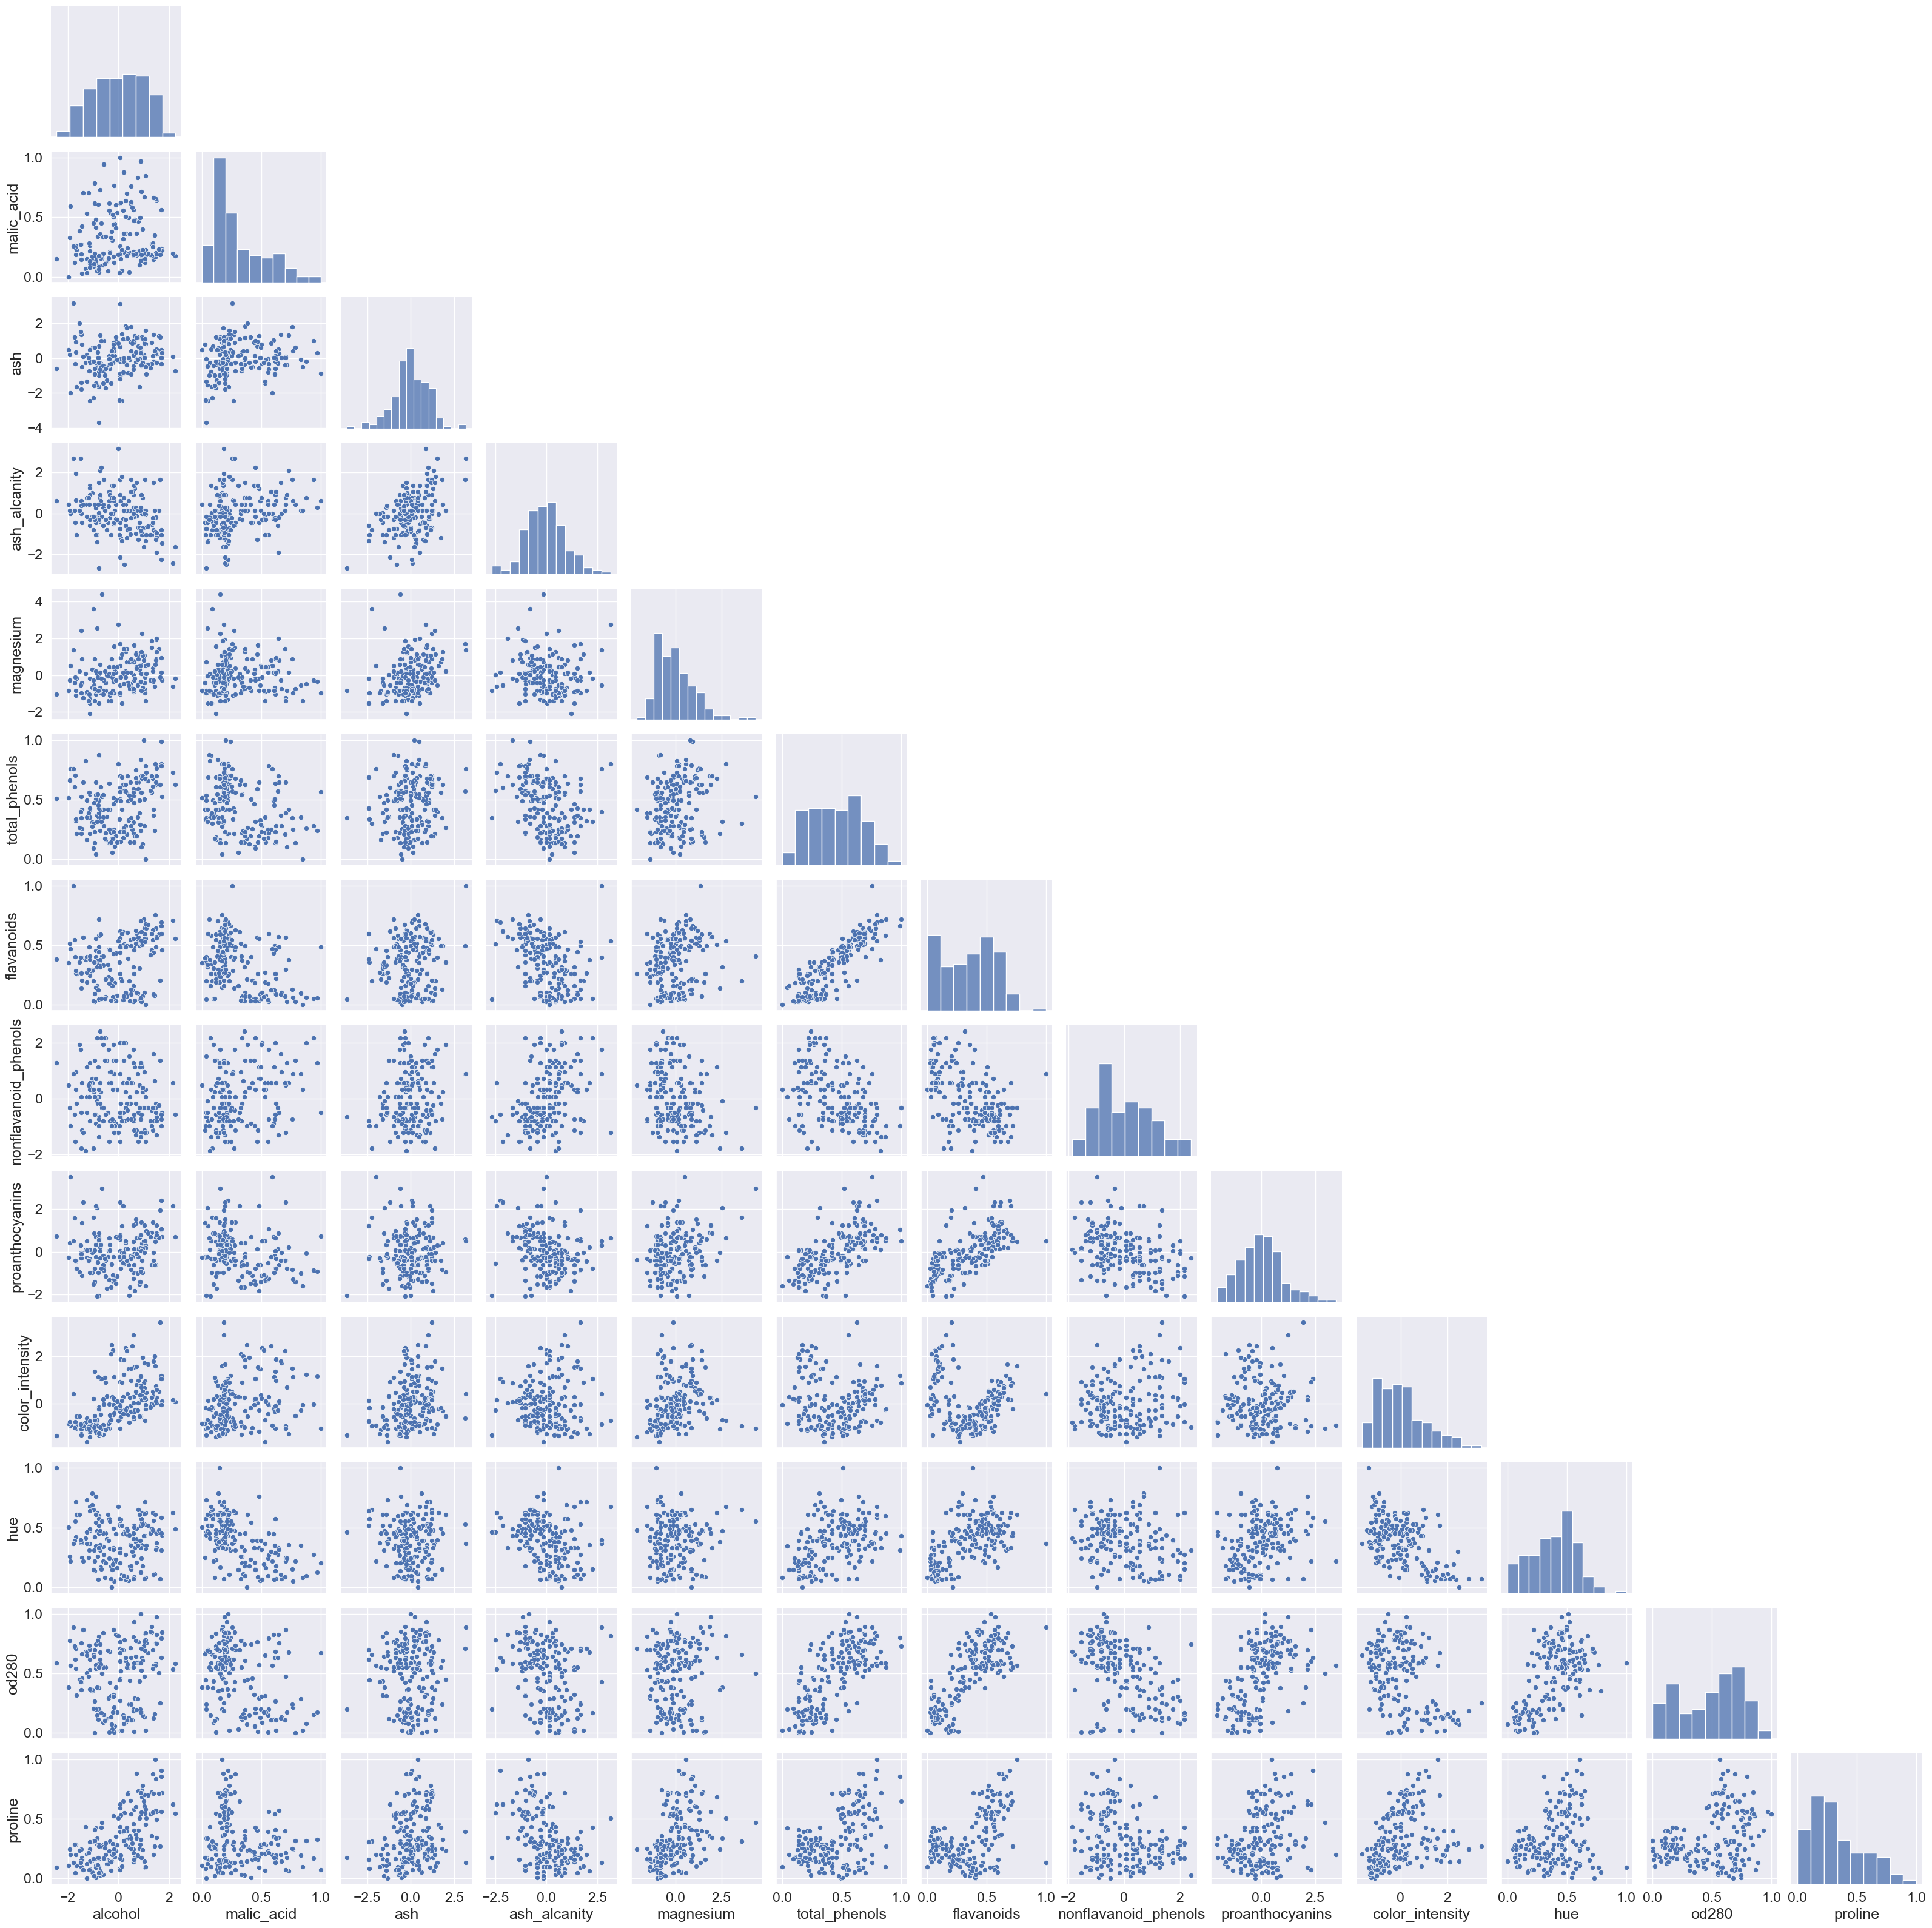

In [6]:
# O 'pairplot' envolve a projeção dos dados em planos 2-D considerando todos os pares de variáveis possíveis.
sns.set(font_scale=1.5)
sns.pairplot(df, corner=True);

Para algumas *features*, como **total_phenols** e **flavanoids**, **od280** e **flavanoids**, entre outras, observamos uma dispersão quase que linear, indicando correlação entre essas variáveis.

## 3.2 - Box Plot

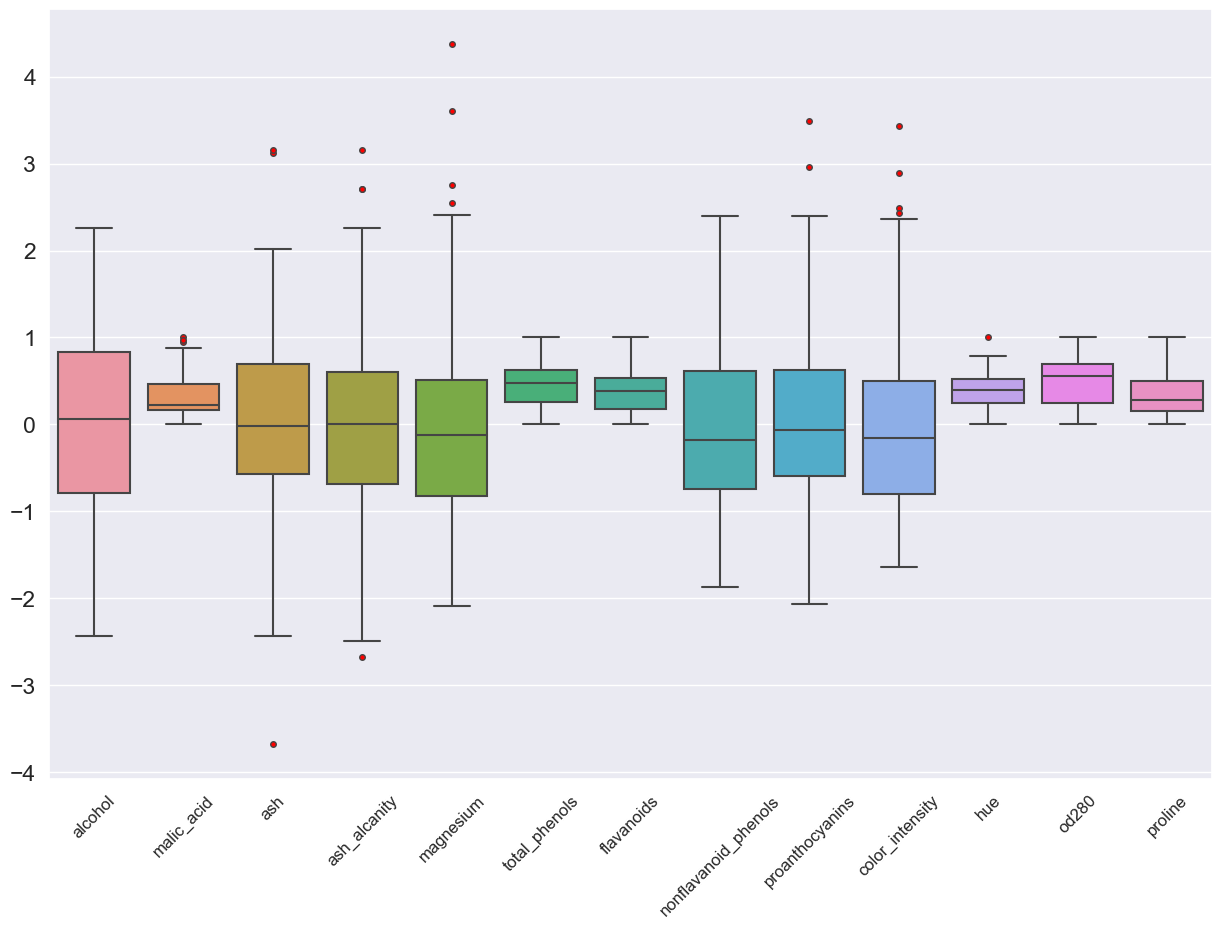

In [7]:
# Box plot
plt.figure(figsize = (15,10))
sns.set_palette("husl") 

# Inclinação dos rótulos das variáveis
plt.xticks(rotation=45, fontsize=12)

# Criando o boxplot
sns.boxplot(data=df, flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.show()

Há poucos *outliers* presentes nos dados, felizmente. Pois o algoritmo *K-Means* em especial é sensível a pontos distantes do centro dos *clusters*, podendo distorcê-los.